Text(0, 0.5, 'Amplituda sygnału z czoła (EMG)')

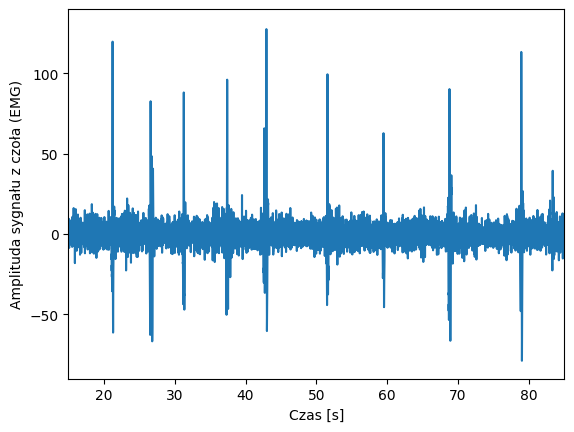

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import aseegg as ag

df = pd.read_csv("proba2/ganglion_4ch_2025-12-05_10-58-15.csv")
t_axis = np.linspace(0, len(df['ch1'])/200, len(df['ch1']))
f_axis = np.linspace(0, 200, len(df['ch1']))
# plt.plot(t_axis, df['ch1'])
# plt.plot(f_axis, ag.FFT(df['ch1']))
przef = ag.gornoprzepustowy(df['ch1'], 200, 1)
przef = ag.pasmowozaporowy(przef, 200, 48, 52)
przef = ag.pasmowoprzepustowy(przef, 200, 3, 40)

t_axis = np.linspace(0,len(przef)/200,len(przef))
plt.plot(t_axis, przef)
plt.xlim([15, 85])
plt.ylim([-90, 140])
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda sygnału z czoła (EMG)")

In [38]:
# litery = pd.read_table("proba2/letter_log.txt", header=None)
# litery.rename(columns={0: "litera", 1: "start", 2: "koniec"}, inplace=True)
# litery
# df2 = df.map(lambda probka: (
#     for litera in litery:
#         if not(df['time'] > litera['start'] and df['time'] < litera['koniec']):
#             probka['ch1'] = 0
#     return probka
# ))
# 
# plt.plot(t_axis)

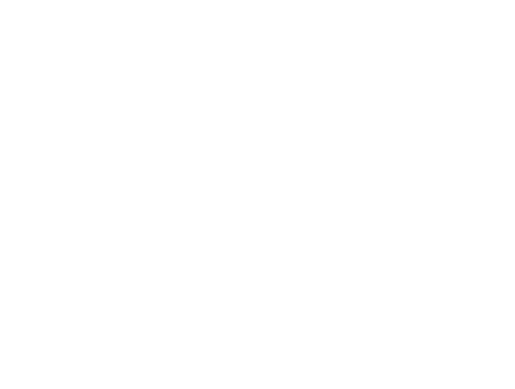

In [11]:
# eksport pliku .svg do strony tytułowej
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import aseegg as ag

df = pd.read_csv("proba2/ganglion_4ch_2025-12-05_10-58-15.csv")
przef = ag.gornoprzepustowy(df['ch1'], 200, 1)
przef = ag.pasmowozaporowy(przef, 200, 48, 52)
przef = ag.pasmowoprzepustowy(przef, 200, 3, 40)
t_axis = np.linspace(0,len(przef)/200,len(przef))

plt.plot(t_axis, przef, color='white', linewidth=.5)
plt.xlim([20, 25])
plt.ylim([-90, 140])
plt.axis('off')
plt.savefig(
    "fala-tytulowa.svg",
    transparent=True,
    pad_inches=0,
    bbox_inches='tight'
)